In [1]:
import numpy as np
from scipy import linalg

# 1. Image Compression in the context of Truncated SVD

$$
A = U \Sigma V^{\top} = U_r D V^{\top}_r, \quad
D_t =
\begin{bmatrix}
\sigma_1 &        &        & &        \\
         & \ddots &        & &        \\
         &        & \sigma_t & &        \\
         &        &  & \ddots&        \\
         &        &        & & \sigma_r
\end{bmatrix}
$$
$$
A^\star \approx U_t D_t V_t^{\top}
$$

$A \in \mathbb{R}^{m \times n}$ is the original image represented as a matrix of pixel values.

- $m = $ number of rows (height, pixels vertically)
- $n = $ number of columns (width, pixels horizontally)
- $a_{ij} \in [0, 255]$, if using 8-bit gray scale, which we assume to be the case

For color image, there are three matrices, $A^{(R)}$, $A^{(G)}$, $A^{(B)}$; in this post we only cover gray scales for the sake of simplicity.

Meaning of good compression:

- $\|A\mathbf{x} - A^\star \mathbf{x}\| \Rightarrow \|A - A^\star\| $ is small enough

Measuring the how much the image is compressed:

```python
# Restore Original Image (if, hypothetically)
## U: m x m
## s : min(m, n)
## VT : n x n
## Total data = m x m + n x n + min(m , n)
U @ linalg.diagsvd(s, m, n) @ VT

# truncated SVD
## U[:, :t]: m x t
## s[:t] : t
## VT[:t, :] : t x n
## Total data = t * (m + n + 1)
U[:, :t] * s[:t] @ VT[:t, :]
```

- ```t < m*n / (m+n+1)``` $\rightarrow$ the size of data required becomes smaller than ```m x n```
- ```t*(m+n+1) / (m x n)``` : compression rate

Implementing SVD to compress image:

```python
""" python implementataion """
# SVD
U, S, VT = linalg.svd(A)

# Trunc A
A_truc = U[:, :t] * s[:t] @ VT[:t, :]
```

# 2. Image Compression in Python

In [2]:
# pip install scikit-image
from skimage import io as imgio

In [3]:
import matplotlib.pyplot as plt

## 2.1 Example 1

In [4]:
img_mat = imgio.imread('tsugai.jpg', as_gray=True)

In [5]:
U, s, VT = linalg.svd(img_mat)

m = img_mat.shape[0]
n = img_mat.shape[1]

# original image # too much data
img_recon = U @ linalg.diagsvd(s, m, n) @ VT

# trunc image
t = 10 # arbitrary
img_trunc = U[:, :t] * s[:t] @ VT[:t, :]

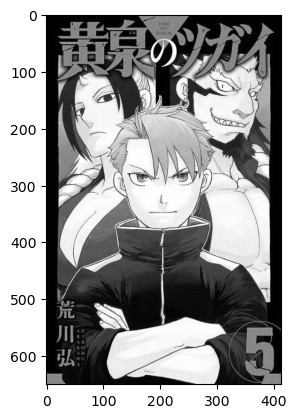

In [6]:
# Original
plt.imshow(img_mat, cmap='gray')
plt.show()

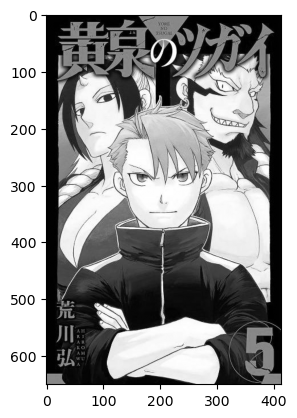

In [7]:
# Original # Reconstructed
plt.imshow(img_recon, cmap='gray')
plt.show()

number of singluar values = 413


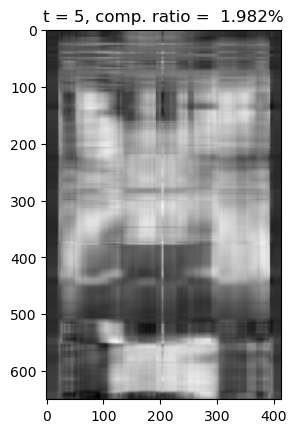

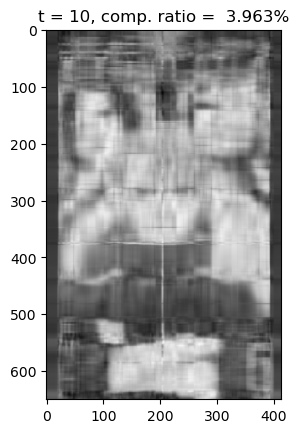

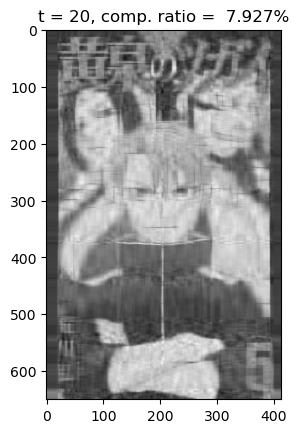

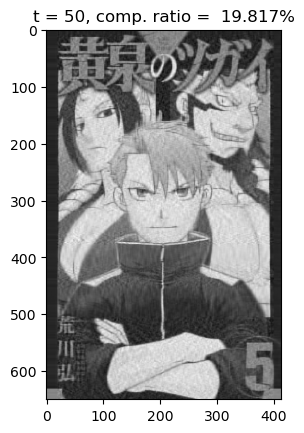

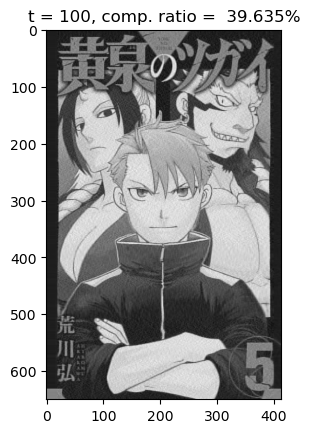

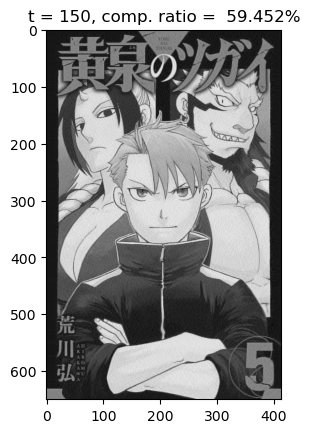

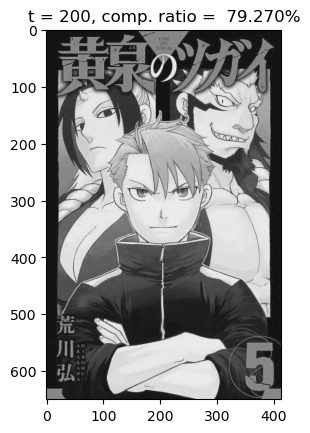

In [8]:
# trunc image
print(f'number of singluar values = {len(s)}')

for i in [5, 10, 20, 50, 100, 150, 200]:
    t = i # arbitrary
    img_trunc = U[:, :t] * s[:t] @ VT[:t, :]

    comp_ratio = t*(m+n+1)/(m*n)

    
    plt.imshow(img_trunc, cmap='gray')
    plt.title(f't = {t}, comp. ratio = {comp_ratio: .3%}')
    plt.show()
    

## 2.2 Example 2

In [9]:
img_mat = imgio.imread('aot.jpg', as_gray=True)

U, s, VT = linalg.svd(img_mat)

m = img_mat.shape[0]
n = img_mat.shape[1]

# original image # too much data
# img_recon = U @ linalg.diagsvd(s, m, n) @ VT

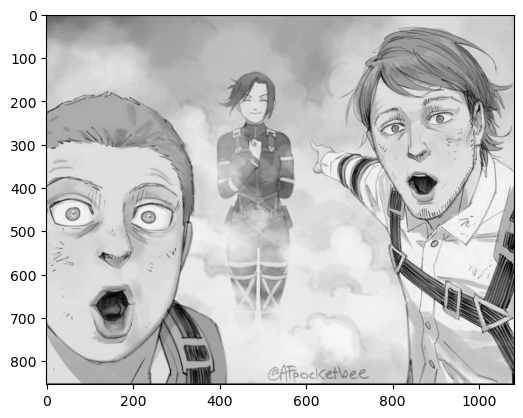

In [10]:
# Original
plt.imshow(img_mat, cmap='gray')
plt.show()

number of singluar values = 854


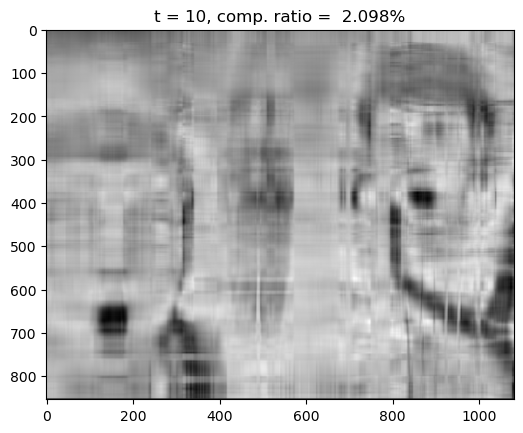

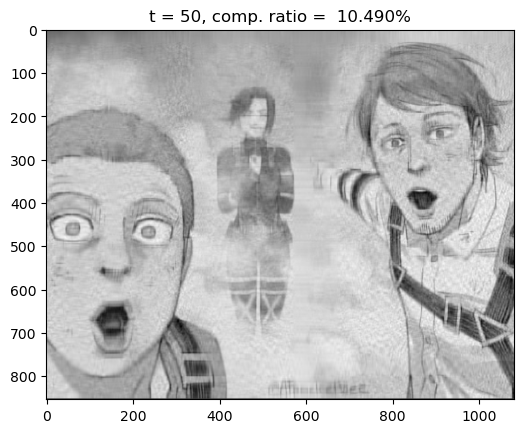

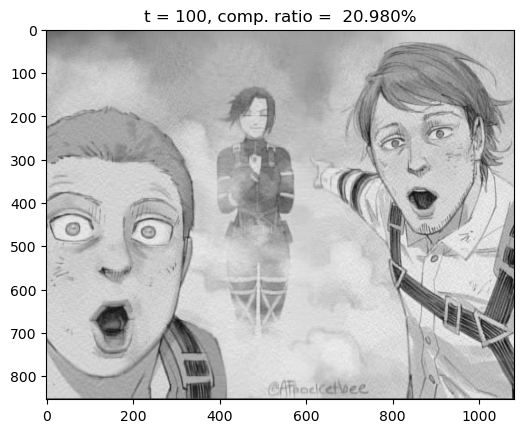

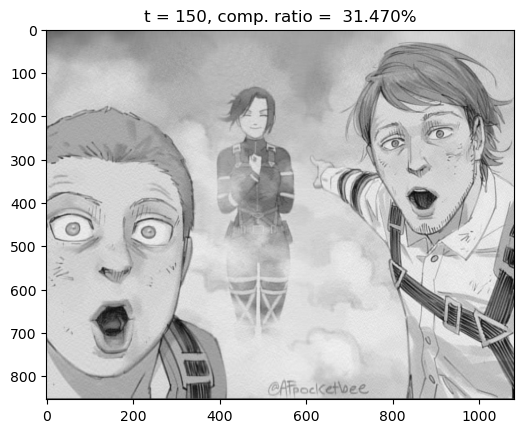

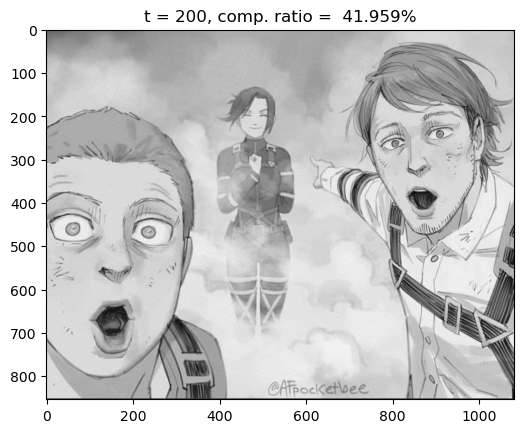

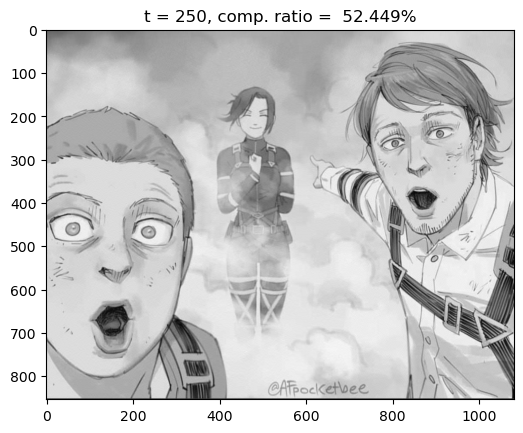

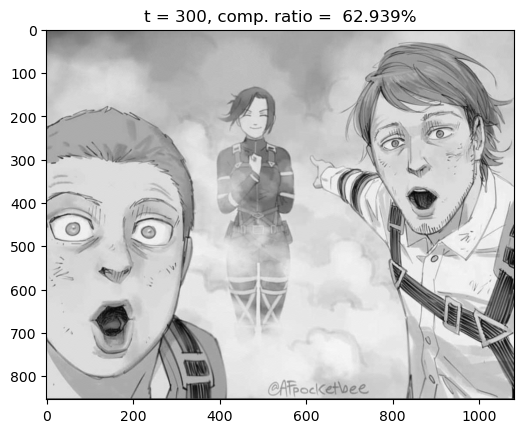

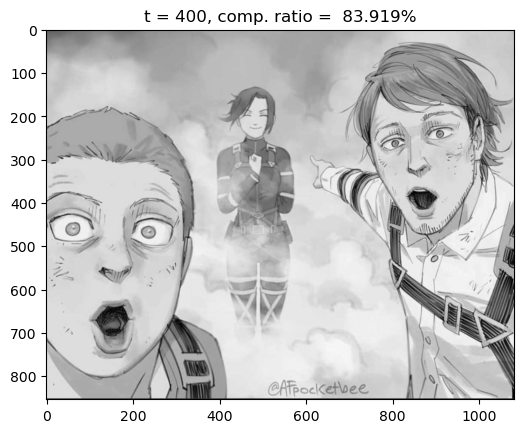

In [11]:
# trunc image
print(f'number of singluar values = {len(s)}')

for i in [10, 50, 100, 150, 200, 250, 300, 400]:
    t = i # arbitrary
    img_trunc = U[:, :t] * s[:t] @ VT[:t, :]

    comp_ratio = t*(m+n+1)/(m*n)

    
    plt.imshow(img_trunc, cmap='gray')
    plt.title(f't = {t}, comp. ratio = {comp_ratio: .3%}')
    plt.show()
    